## 도미빙어 분류

### 데이터 준비
- 도미 길이,무게 데이터
    - http://bit.ly/bream_list
- 빙어 길이,무게 데이터
    - http://bit.ly/smelt_list


In [ ]:
# 도미 35마리
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [ ]:
# 빙어 14마리
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

### 산점도
- 데이터가 어떻게 분포되었는지 도표
- x, y축으로 이루어지고, (x, y)간의 관계를 표시

In [5]:
import matplotlib.pyplot as plt

In [12]:
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf' # 맑은고딕체로 변경
font = font_manager.FontProperties(fname=font_path).get_name() # 실제 설치된 폰트 이름조회
rc('font', family=font) # 한글깨짐현상 해결!!
rcParams['axes.unicode_minus'] = False # 한글 사용시 마이너스 표시 깨짐 해결!

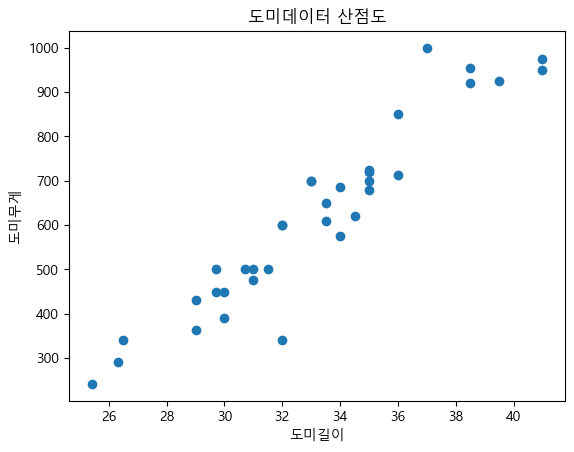

In [21]:
# 산점도 도표 함수 scatter()
plt.scatter(bream_length, bream_weight) # x : 도미길이, y : 도미무게
plt.xlabel('도미길이')
plt.ylabel('도미무게')
plt.title('도미데이터 산점도')
plt.show()

### 데이터 확인
- 두 가지 `특성` - 길이, 무게
- 길이가 길수록 무게가 많이 나간다(당연함)
- 일직선에 가깝다(`선형` Linear)

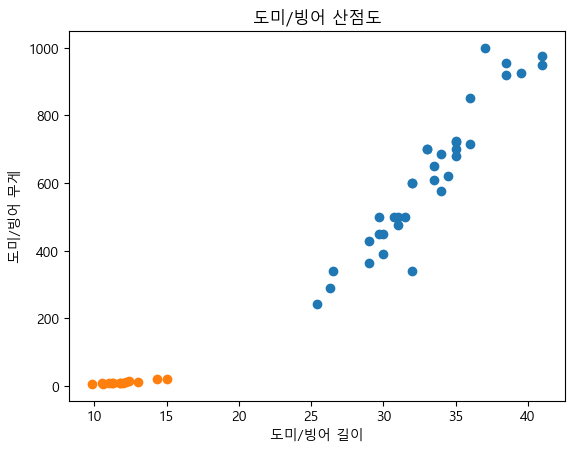

In [26]:
# 도미/빙어 산점도
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('도미/빙어 길이')
plt.ylabel('도미/빙어 무게')
plt.title('도미/빙어 산점도')
plt.show()

### K-최근접 이웃 알고리즘
- k-Nearest Neighbors algoritm

- 도미/빙어 데이터를 합치기 

In [28]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [29]:
len(length) # 35 + 14

49

In [37]:
len(weight)

49

In [ ]:
for l , w in zip(length, weight):
    print(l,w)

In [40]:
fish_data = [[l, w] for l, w in zip(length, weight)]

In [43]:
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


### 각데이터에 대한 분류데이터 생성

In [44]:
# 타겟 데이터
fish_target = [1] * 35 + [0] * 14
print(fish_target)
print(len(fish_target))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
49


- 도미 1 , 빙어 0 으로 분류

#### k-최근접 알고리즘 사용
- 사이킷런 모듈

In [46]:
from sklearn.neighbors import KNeighborsClassifier

- kn은 `모델` 객체

In [47]:
kn = KNeighborsClassifier() # 객체 생성

- fit() 함수로 `훈련(training)` 시작. 

In [48]:
# X : 특성데이터, Y : 결과데이터
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

- 훈련 점수 도출

In [ ]:
# 훈련시킨 데이터를 그대로 집어넣어서 결과가 제대로 나오는지 확인 (1.0)
kn.score(fish_data, fish_target)

1.0

#### K-최근접 이웃 알고리즘
- 주어진 데이터 내에서 새로운 데이터의 근처에 있는 데이터가 무엇인지 확인해서 값을 도축

- predict()로 `예측` 수행

In [92]:
# 길이 30cm, 무게 600g 짜리 물고기가 어떤 종류인지 분류 예측 (0은 빙어 1은 도미)
kn.predict([[30, 600]])

array([1])

- 위의 데이터는 도미라고 예측

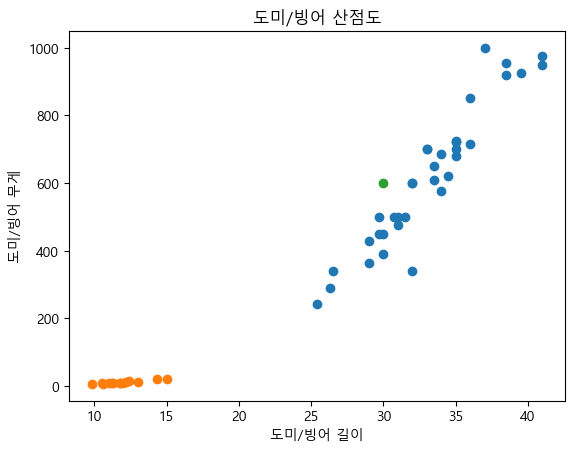

In [99]:
# 도미/빙어 산점도
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter([30],[600])
plt.xlabel('도미/빙어 길이')
plt.ylabel('도미/빙어 무게')
plt.title('도미/빙어 산점도')
plt.show()

분류시 참조하는 이웃데이터 개수

In [100]:
kn.n_neighbors

5

- 이웃으로 참조할 데이터 갯수를 49개로 변경.

In [102]:
kn49 = KNeighborsClassifier(n_neighbors=49)

In [104]:
kn49.fit(fish_data, fish_target)

KNeighborsClassifier(n_neighbors=49)

- 중요치 않는 경고메시지 표시안하게

In [107]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [108]:
kn49.score(fish_data,fish_target)

0.7142857142857143

In [109]:
# 정확도 출처
print(35/49)

0.7142857142857143


In [120]:
kn.predict([[13.5, 15.2]])

array([0])

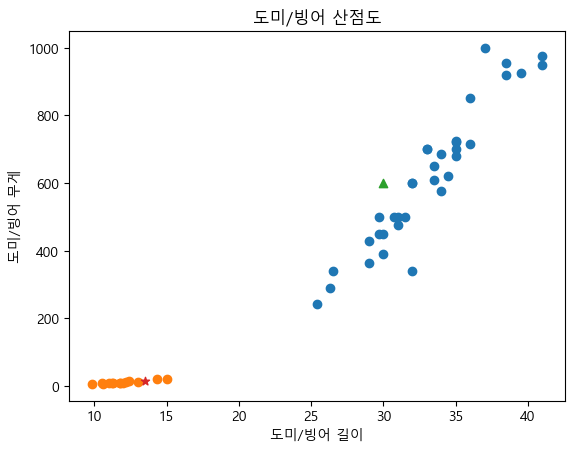

In [124]:
# 도미/빙어 산점도
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter([30],[600], marker='^')
plt.scatter([13.5],[15.2], marker='*')
plt.xlabel('도미/빙어 길이')
plt.ylabel('도미/빙어 무게')
plt.title('도미/빙어 산점도')
plt.show()